# Loan Dataset Analysis

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2022-08-16 12:41:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2022-08-16 12:41:43 (290 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
print('train dataframe shape:', df.shape)

train dataframe shape: (346, 10)


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [8]:
loan_s = df.loan_status.value_counts()
print(loan_s)

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# male value equal to 1, female 0
df['Gender_'] = df['Gender'].apply(lambda x: 1 if x=='male' else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Gender_
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1


In [10]:
df.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [13]:
# Feature selecting
df1 = df[['Principal','terms','Gender_','age','education','weekend']]
df1.head()

,Principal,terms,Gender_,age,education,weekend
0,1000,30,1,45,High School or Below,0
1,1000,30,0,33,Bechalor,0
2,1000,15,1,27,college,0
3,1000,30,0,28,college,1
4,1000,30,1,29,college,1


In [14]:
df1['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'],
                         value=[0,1,2,3],inplace=True)
df1.head()

/var/folders/km/k9s9s4zd24x08bnyw38g8g3c0000gn/T/ipykernel_98792/182373192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'],


,Principal,terms,Gender_,age,education,weekend
0,1000,30,1,45,0,0
1,1000,30,0,33,2,0
2,1000,15,1,27,1,0
3,1000,30,0,28,1,1
4,1000,30,1,29,1,1


In [15]:
X = df1
Y = df.loan_status
print(X[0:5],Y[0:5])

   Principal  terms  Gender_  age  education  weekend
0       1000     30        1   45          0        0
1       1000     30        0   33          2        0
2       1000     15        1   27          1        0
3       1000     30        0   28          1        1
4       1000     30        1   29          1        1 0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object


In [16]:
# normalize X data
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[0:5])

[[ 0.51578458  0.92071769  0.42056004  2.33152555 -0.99512471 -1.20577805]
 [ 0.51578458  0.92071769 -2.37778177  0.34170148  1.83872837 -1.20577805]
 [ 0.51578458 -0.95911111  0.42056004 -0.65321055  0.42180183 -1.20577805]
 [ 0.51578458  0.92071769 -2.37778177 -0.48739188  0.42180183  0.82934003]
 [ 0.51578458  0.92071769  0.42056004 -0.3215732   0.42180183  0.82934003]]


In [17]:
# train and test dataset split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


# K Nearest Neighbor(KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 10):
    knn_model  = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    knn_yhat = knn_model.predict(x_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))

For K = 1 accuracy = 0.6857142857142857
For K = 2 accuracy = 0.6714285714285714
For K = 3 accuracy = 0.7142857142857143
For K = 4 accuracy = 0.6857142857142857
For K = 5 accuracy = 0.7571428571428571
For K = 6 accuracy = 0.6857142857142857
For K = 7 accuracy = 0.8
For K = 8 accuracy = 0.7714285714285715
For K = 9 accuracy = 0.7714285714285715


In [22]:
# The best k is 7
best_knn_model = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)

# Evaluation Metrics and f1 score
from sklearn.metrics import f1_score

print("Train set Accuracy (F1): ", f1_score(y_train, best_knn_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_knn_model.predict(x_test), average='weighted'))

Train set Accuracy (F1):  0.7911407528086074
Test set Accuracy (F1):  0.7881241565452091


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.7857142857142857 
For depth = 2  the accuracy score is 0.7857142857142857 
For depth = 3  the accuracy score is 0.6142857142857143 
For depth = 4  the accuracy score is 0.6142857142857143 
For depth = 5  the accuracy score is 0.6428571428571429 
For depth = 6  the accuracy score is 0.7714285714285715 
For depth = 7  the accuracy score is 0.7571428571428571 
For depth = 8  the accuracy score is 0.7571428571428571 
For depth = 9  the accuracy score is 0.6428571428571429 


In [24]:
# the best depth is 2
best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(x_train, y_train)

from sklearn.metrics import f1_score
print("Train set Accuracy (F1): ", f1_score(y_train, best_dt_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_dt_model.predict(x_test), average='weighted'))

Train set Accuracy (F1):  0.6331163939859591
Test set Accuracy (F1):  0.6914285714285714


[Text(167.4, 181.2, 'X[5] <= -0.188\nentropy = 0.823\nsamples = 276\nvalue = [71, 205]'),
 Text(83.7, 108.72, 'X[4] <= -0.287\nentropy = 0.126\nsamples = 116\nvalue = [2, 114]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.211\nsamples = 60\nvalue = [2, 58]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -1.46\nentropy = 0.986\nsamples = 160\nvalue = [69, 91]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.99\nsamples = 156\nvalue = [69, 87]')]

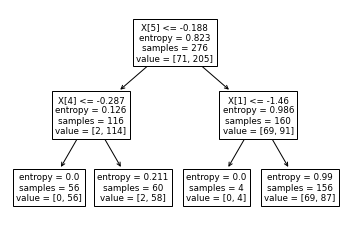

In [26]:
plot_tree(best_dt_model)

# SVM

In [27]:
from sklearn import svm 

for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.6892857142857144
For kernel: rbf, the f1 score is: 0.6670522459996144
For kernel: sigmoid, the f1 score is: 0.7064793130366899


In [28]:
# the best is sigmoid
best_svm = svm.SVC(kernel='sigmoid').fit(x_train,y_train)
print("Train set Accuracy (F1): ", f1_score(y_train, best_svm.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm.predict(x_test), average='weighted'))

Train set Accuracy (F1):  0.6168631785802013
Test set Accuracy (F1):  0.7064793130366899


# LR

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4931905393169537
When Solver is saga, logloss is : 0.49318996922513575
When Solver is liblinear, logloss is : 0.5777480621814878
When Solver is newton-cg, logloss is : 0.4931904501086099
When Solver is sag, logloss is : 0.49319875114725287


In [30]:
# Best logistic regression model with liblinear solver
best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(x_test), average='weighted'))

Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144
